<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/%EC%9E%A5%EA%B8%B0/%ED%8C%8C%EC%9D%B4%ED%94%84%EB%9D%BC%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 설치 및 불러오기

In [ ]:
Generated_Summary= "우리집은 가난했고, 그 애는 불행했다. 우리집은 네 가족이 방 두 개짜리 전세금에 쩔쩔맸고, 그 애는 화장실 옆 천막을 치고 아궁이를 걸어 간이 부엌을 "
Generated_Summary =  Generated_Summary.replace('.', '.\n')
Summary = Generated_Summary.split('\n')
Summary
if '.' not in Summary[-1]:
    print(Summary[-2])
else:
    print(Summary)

우리집은 가난했고, 그 애는 불행했다.


In [ ]:
a = [['이날은 교원인 듯한 양복쟁이를 동광학교에 태워다 주기로 하는 등 오래간만에 김첨지에게 닥친 운수 좋은 날이었다.', '김첨지는 오래간만에 김첨지에게 의지하면 오라질 년이 천방지축으로 냄비는에 손을 대고 끓였고 오래간만에 김첨지는 김첨지를 쉽게 물리쳤다.']]
a

[['이날은 교원인 듯한 양복쟁이를 동광학교에 태워다 주기로 하는 등 오래간만에 김첨지에게 닥친 운수 좋은 날이었다.',
  '김첨지는 오래간만에 김첨지에게 의지하면 오라질 년이 천방지축으로 냄비는에 손을 대고 끓였고 오래간만에 김첨지는 김첨지를 쉽게 물리쳤다.']]

In [ ]:
!pip install google-cloud-vision
!pip install PyMuPDF
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 5.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.3 MB/s eta 0:00:00


In [ ]:
from PIL import Image
from google.cloud import vision
import numpy as np
import fitz
import zipfile
import cv2
import io
import os
import torch
from transformers import PreTrainedTokenizerFast
from transformers.models.bart import BartForConditionalGeneration

#### 파일 저장할 폴더 생성

In [ ]:
# 파일 저장할 폴더 생성
os.mkdir("/content/upload_file")
os.mkdir("/content/image_file")

#### 파일 업로드

In [ ]:
# 코렙이라서 사용, flask에서는 다른 방법 필요
%cd /content/upload_file
from google.colab import files
uploaded = files.upload()

/content/upload_file


Saving 현진건-운수좋은날+B3356-개벽.pdf to 현진건-운수좋은날+B3356-개벽 (1).pdf


In [ ]:
# # 시연용 PDF 다운로드 링크
# !gdown 1yZn0AiyDfO7vjU98HELbyUjIf_N1tc4i

In [ ]:
file_names = os.listdir('/content/upload_file')
if '.ipynb_checkpoints' in file_names:
    file_names.remove('.ipynb_checkpoints')
file_names

['현진건-운수좋은날+B3356-개벽 (1).pdf']

### PDF 혹은 image 파일 ocr

##### PDF to IMG

In [ ]:
def pdf_to_png(files):
    path = f"/content/upload_file/{files}"
    doc = fitz.open(path)
    for i, page in enumerate(doc):
        img = page.get_pixmap()
        img.save(f"/content/image_file/{i}.png")

In [ ]:
file_paths = file_names[0]
print(file_paths)
pdf_to_png(file_paths)

현진건-운수좋은날+B3356-개벽 (1).pdf


##### 멘토님 함수

In [ ]:
# import io
# import os

# # Set environment variable
# os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/true-shore-401100-ee23c4c8c319.json"

In [ ]:
# # Imports the Google Cloud client library
# from google.cloud import vision

# # Instantiates a client
# client = vision.ImageAnnotatorClient()

# # The name of the image file to annotate
# file_name = os.path.abspath('/content/2.jpg')

# # Loads the image into memory
# with io.open(file_name, 'rb') as image_file:
#     content = image_file.read()

# image = vision.Image(content=content)

# # Performs label detection on the image file
# response = client.label_detection(image=image)
# labels = response.label_annotations

# print('Labels:')

Labels:


In [ ]:
# for label in labels:
#     print(label.description)

# Performs text detection on the image file
# response = client.text_detection(image=image)
# texts = response.text_annotations

Font
Number
Document
Screenshot
Paper


In [ ]:
# response = client.document_text_detection(image=image)
# pages = response.full_text_annotation.pages

In [ ]:
# breaks = vision.TextAnnotation.DetectedBreak.BreakType
# paragraphs = []
# lines = []

# for page in pages:
#     for block in page.blocks:
#         for paragraph in block.paragraphs:
#             para = "★문단시작★"
#             line = ""
#             for word in paragraph.words:
#                 for symbol in word.symbols:
#                     line += symbol.text
#                     if symbol.property.detected_break.type == breaks.SPACE:
#                         line += ' '
#                     if symbol.property.detected_break.type == breaks.EOL_SURE_SPACE:
#                         line += ' '
#                         lines.append(line)
#                         para += line
#                         line = ''
#                     if symbol.property.detected_break.type == breaks.LINE_BREAK:
#                         lines.append(line)
#                         para += line
#                         line = ''
#             paragraphs.append(para)

# print(paragraphs)

['★문단시작★<그 애>', '★문단시작★작자미상', '★문단시작★우리는 개천 쪽으로 문이 난 납작한 집들이 게딱지처럼 따닥따닥 붙어있는 동네에서 자 랐다. 그 동네에선 누구나 그렇듯 그 애와 나도 가난했다. 물론 다른 점도 있었다. 내 아 버지는 번번히 월급이 밀리는 시원찮은 회사의 영업사원이었다. 그 애의 아버지는 한쪽 안구에 개 눈을 박아 넣고 지하철에서 구걸을 했다. 내 어머니는 방 한가운데 산처럼 쌓 아 놓은 개구리 인형에 눈을 박았다. 그 애의 어머니는 청계천 골목에서 커피도 팔고 박 카스도 팔고 이따금 곱창집 뒷 방에서 몸도 팔았다.', '★문단시작★우리집은 네 가족이 방 두 개짜리 전세금에 쩔쩔맸고, 그 애는 화장실 옆 천막을 치고 아궁이를 걸어 간이 부엌을 만든 하코방에서 살았다. 나는 어린이날 탕수육을 못 먹고 짜장면만 먹는다고 울었고, 그 애는 엄마가 외박하는 밤이면 아버지의 허리띠를 피해서 맨발로 포도를 다다다닥 달렸다. 말하자면 그렇다. 우리집은 가난했고, 그 애는 불행했다.', '★문단시작★가난한 동네는 국민학교도 작았다. 우리는 4학년때 처음 한 반이 되었다. 우연히 그 애 집을 지나가다가 길가로 훤히 드러나는 아궁이에다 라면을 끓이는 그 애를 보았다. 그 애가 입은 늘어난 러닝셔츠엔 김치국물이 묻어 있었고 얼굴엔 김치국물 같은 핏자국이 말라붙어 있었다. 눈싸움인지 서로를 노려보다가 내가 먼저 말했다. 너네 부엌 뽑기 만들 기에 최고다. 나는 집에서 국자와 설탕을 훔쳐왔고, 국자바닥을 까맣게 태우면서 우리는 친구가 되었다.', '★문단시작★사정이 좀 풀려서 우리집은 서울 반대편으로 이사를 했다. 아버지는 친척이 소개 시켜준 회사에 나갔다. 월급은 밀리지 않았고 어머니는 부업을 그만두었다. 나는 가끔 그 애에게 편지를 썼다. 크리스마스에는 일년동안 쓴 딱딱한 커버의 일기장을 그 애에게 보내기도 했다. 그 애는 얇은 공책을 하나 보냈다. 일기는 몇 장 되지 않았다. 3월 4일 개학했다. 선생님한테 맞았다. 6월 1일 딸기를 먹었다. 9월

In [ ]:
# print('\n'.join(paragraphs))

★문단시작★<그 애>
★문단시작★작자미상
★문단시작★우리는 개천 쪽으로 문이 난 납작한 집들이 게딱지처럼 따닥따닥 붙어있는 동네에서 자 랐다. 그 동네에선 누구나 그렇듯 그 애와 나도 가난했다. 물론 다른 점도 있었다. 내 아 버지는 번번히 월급이 밀리는 시원찮은 회사의 영업사원이었다. 그 애의 아버지는 한쪽 안구에 개 눈을 박아 넣고 지하철에서 구걸을 했다. 내 어머니는 방 한가운데 산처럼 쌓 아 놓은 개구리 인형에 눈을 박았다. 그 애의 어머니는 청계천 골목에서 커피도 팔고 박 카스도 팔고 이따금 곱창집 뒷 방에서 몸도 팔았다.
★문단시작★우리집은 네 가족이 방 두 개짜리 전세금에 쩔쩔맸고, 그 애는 화장실 옆 천막을 치고 아궁이를 걸어 간이 부엌을 만든 하코방에서 살았다. 나는 어린이날 탕수육을 못 먹고 짜장면만 먹는다고 울었고, 그 애는 엄마가 외박하는 밤이면 아버지의 허리띠를 피해서 맨발로 포도를 다다다닥 달렸다. 말하자면 그렇다. 우리집은 가난했고, 그 애는 불행했다.
★문단시작★가난한 동네는 국민학교도 작았다. 우리는 4학년때 처음 한 반이 되었다. 우연히 그 애 집을 지나가다가 길가로 훤히 드러나는 아궁이에다 라면을 끓이는 그 애를 보았다. 그 애가 입은 늘어난 러닝셔츠엔 김치국물이 묻어 있었고 얼굴엔 김치국물 같은 핏자국이 말라붙어 있었다. 눈싸움인지 서로를 노려보다가 내가 먼저 말했다. 너네 부엌 뽑기 만들 기에 최고다. 나는 집에서 국자와 설탕을 훔쳐왔고, 국자바닥을 까맣게 태우면서 우리는 친구가 되었다.
★문단시작★사정이 좀 풀려서 우리집은 서울 반대편으로 이사를 했다. 아버지는 친척이 소개 시켜준 회사에 나갔다. 월급은 밀리지 않았고 어머니는 부업을 그만두었다. 나는 가끔 그 애에게 편지를 썼다. 크리스마스에는 일년동안 쓴 딱딱한 커버의 일기장을 그 애에게 보내기도 했다. 그 애는 얇은 공책을 하나 보냈다. 일기는 몇 장 되지 않았다. 3월 4일 개학했다. 선생님한테 맞았다. 6월 1일 딸기를 먹었다. 9월 3일 누나가 아파서 아버지가 

In [ ]:
# # 512씩 문단 묶기
# for i in range(paragraphs):
#   print("")
#   print("\n")

##### 함수화

In [ ]:
def detect_paragraphs(image_path):
    from google.cloud import vision
    # API키 가져오기
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/content/drive/MyDrive/api-project-397750607032-5ddc025931cd.json"

    # API 가져오기
    client = vision.ImageAnnotatorClient()

    # 주석을 추가할 이미지 파일 이름
    file_name = os.path.abspath(image_path)

    # 이미지 로드
    with io.open(file_name, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    # 이미지 OCR
    response = client.document_text_detection(image=image)

    # 이미지 OCR 텍스트 전문
    full_text = response.full_text_annotation.text

    # 이미지 OCR 후 결과 (bbox, word 등)
    pages = response.full_text_annotation.pages

    # 텍스트 주석
    # 참고 : https://cloud.google.com/dotnet/docs/reference/Google.Cloud.Vision.V1/latest/Google.Cloud.Vision.V1.TextAnnotation.Types.DetectedBreak.Types.BreakType
    # 참고 : https://googleapis.github.io/googleapis/java/grpc-google-cloud-vision-v1/0.1.5/apidocs/com/google/cloud/vision/v1/TextAnnotation.DetectedBreak.BreakType.html
    breaks = vision.TextAnnotation.DetectedBreak.BreakType

    paragraphs = []
    lines = []

    for page in pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                para = "★문단시작★"
                line = ""
                for word in paragraph.words:
                    for symbol in word.symbols:
                        line += symbol.text
                        # breaks.SPACE : 공백
                        if symbol.property.detected_break.type == breaks.SPACE:
                            line += ' '
                        # breaks.EOL_SURE_SPACE : 줄 바꿈
                        if symbol.property.detected_break.type == breaks.EOL_SURE_SPACE:
                            line += ' '
                            lines.append(line)
                            para += line
                            line = ''
                        # breaks.LINE_BREAK : 단락을 끝내는 줄바꿈
                        if symbol.property.detected_break.type == breaks.LINE_BREAK:
                            lines.append(line)
                            para += line
                            line = ''
                paragraphs.append(para)

    return full_text, paragraphs

##### 실제 데이터 사용

In [ ]:
# 함수 시험
text_full, paragraphs = [], []
for i in os.listdir('/content/image_file'):
    image_path = f"/content/image_file/{i}"
    if image_path[-4:] == '.png':
        text_full2, paragraphes = detect_paragraphs(image_path)
        text_full.append(text_full2)
        paragraphs.append(paragraphes)
print(text_full)
print(paragraphs)

['이 맺히었다. 김첨지의 눈시울도 뜨끈뜨끈하였다.\n이 환자가 그러고도 먹는 데는 물리지 않았다. 사흘 전부터 설렁탕 국물이\n마시고 싶다고 남편을 졸랐다.\n"이런 오라질 년! 조밥도 못 먹는 년이 설렁탕은 또 처먹고 지랄병을 하\n게."\n라고, 야단을 쳐보았건만, 못 사주는 마음이 시원치는 않았다.\n인제 설렁탕을 사줄 수도 있다. 앓는 어미 곁에서 배고파 보채는 개똥이\n(세살먹이)에게 죽을 사줄 수도 있다 - 팔십 전을 손에 쥔 김 첨지의 마음\n은 푼푼하였다.\n그러나 그의 행운은 그걸로 그치지 않았다. 땀과 빗물이 섞여 흐르는 목덜\n미를 기름주머니가 다된 왜목 수건으로 닦으며, 그 학교 문을 돌아 나올 때\n였다. 뒤에서 "인력거!" 하고 부르는 소리가 난다. 자기를 불러 멈춘 사\n람이 그 학교 학생인 줄 김첨지는 한번 보고 짐작할 수 있었다. 그 학생은\n다짜고짜로,\n"남대문 정거장까지 얼마요."\n라고 물었다. 아마도 그 학교 기숙사에 있는 이로 동기방학을 이용하여 귀\n향하려 함이리라. 오늘 가기로 작정은 하였건만 비는 오고, 짐은 있고 해서\n어찌할 줄 모르다가 마침 김첨지를 보고 뛰어나왔음이리라. 그렇지 않으면\n왜 구두를 채 신지 못해서 질질 끌고, 비록 고구라 양복일망정 노박이로 비\n를 맞으며 김첨지를 뒤쫓아 나왔으랴.\n"남대문 정거장까지 말씀입니까."\n하고 김첨지는 잠깐 주저하였다. 그는 이 우중에 우장도 없이 그 먼 곳을\n철벅거리고 가기가 싫었음일까? 처음 것 둘째 것으로 고만 만족하였음일까?\n아니다 결코 아니다. 이상하게도 꼬리를 맞물고 덤비는 이 행운 앞에 조금\n겁이 났음이다. 그리고 집을 나올 제 아내의 부탁이 마음이 켕기었다 - 앞\n집 마마님한테서 부르러 왔을 제 병인은 뼈만 남은 얼굴에 유일의 샘물 같\n은 유달리 크고 움푹한 눈에 애걸하는 빛을 띄우며,\n"오늘은 나가지 말아요. 제발 덕분에 집에 붙어 있어요. 내가 이렇게 아\n픈데・・・・・.."\n라고, 모기 소리같이 중얼거리고 숨을 걸그렁걸그렁하였

In [ ]:
# 전문 문자 개수
text_full= """
선배에게 무슨 말을 어떻게 들었는지 모르겠지만 시게타 씨
는 이미 여행 멤버가 되어 있는 듯했다.
술이 들어가고 선배가 화장실에 가자 시게타 씨는 내 쪽으
로 바짝 다가왔다.
'사이키 군이 당신네 회사에 언제 들어갔나요?"
"1년 전인데요."
"흐음・・・・・・ 그래서 지금은 어떤가요? 일은 잘하고 있나요?"
"아마 그럴 거라고 생각하는데요. 부서가 달라서 자세히는
모르겠지만요."
"뭔가 문제를 일으키거나 하지는 않았나요?"
시게타 씨는 목소리를 더욱 낮추었다. 시게타 씨의 무거운
표정에서 자연스레 무슨 말이 하고 싶은지 알 것 같았다. 나도
목소리를 낮추었다.
"실은 선배, 뭐랄까요…………. 회사 특별 채용으로 들어온 것
같아요. 장애라고 말하면 과하지만 조금 문제가 있는 사람이
들어온다는 메일이 돌았었거든요. 하지만 설마 그 사람이 사
이키 선배일 줄이야.…. 회사에서 만났을 때는 정말 놀랐습
니다."
회사 화장실에서 "여어 마시마 군 격조했습니다." 하고 선
배가 말을 걸어왔던 것이다. 처음에는 누구인지 알아보지 못
017
"""
len(text_full)

527

In [ ]:
paragraphs = ['★문단시작★선배에게 무슨 말을 어떻게 들었는지 모르겠지만 시게타 씨', '★문단시작★는 이미 여행 멤버가 되어 있는 듯했다.', '★문단시작★술이 들어가고 선배가 화장실에 가자 시게타 씨는 내 쪽으', '★문단시작★로 바짝 다가왔다.', '★문단시작★\'사이키 군이 당신네 회사에 언제 들어갔나요?"', '★문단시작★"1년 전인데요."', '★문단시작★"흐음・・・・・・ 그래서 지금은 어떤가요? 일은 잘하고 있나요?"', '★문단시작★"아마 그럴 거라고 생각하는데요. 부서가 달라서 자세히는 모르겠지만요."', '★문단시작★"뭔가 문제를 일으키거나 하지는 않았나요?"', '★문단시작★시게타 씨는 목소리를 더욱 낮추었다. 시게타 씨의 무거운 표정에서 자연스레 무슨 말이 하고 싶은지 알 것 같았다. 나도 목소리를 낮추었다.', '★문단시작★"실은 선배, 뭐랄까요…………. 회사 특별 채용으로 들어온 것 같아요. 장애라고 말하면 과하지만 조금 문제가 있는 사람이 들어온다는 메일이 돌았었거든요. 하지만 설마 그 사람이 사 이키 선배일 줄이야.…. 회사에서 만났을 때는 정말 놀랐습 니다."', '★문단시작★회사 화장실에서 "여어 마시마 군 격조했습니다." 하고 선 배가 말을 걸어왔던 것이다. 처음에는 누구인지 알아보지 못', '★문단시작★017']

##### 문단 시각화

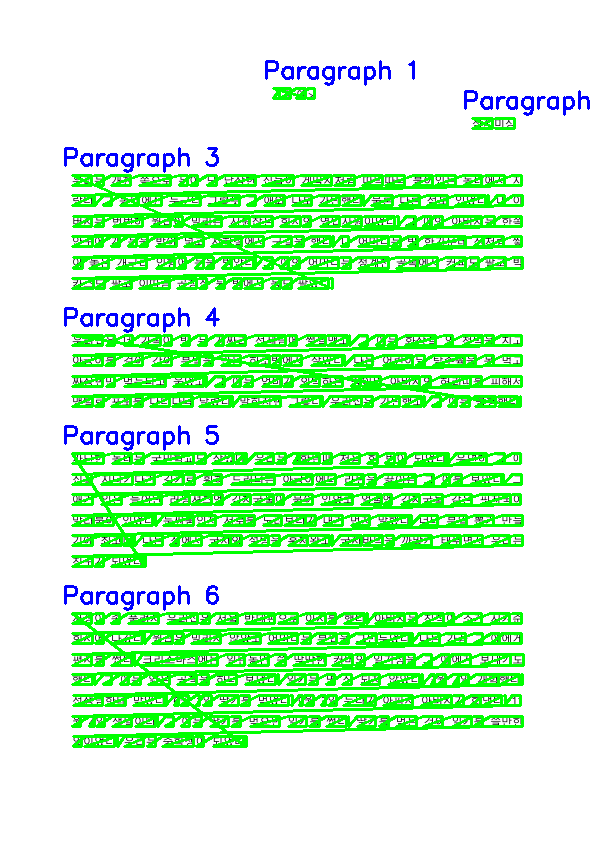

Specific Paragraph 3:
우리 는 개천 쪽으로 문 이 난 납작한 집들이 게딱지 처럼 따닥 따닥 붙어 있는 동네 에서 자 랐다 . 그 동네 에선 누구나 그렇듯 그 애와 나도 가난 했다 . 물론 다른 점도 있었다 . 내 아 버지 는 번번히 월급 이 밀리는 시원 찮은 회사 의 영업 사원 이었다 . 그 애 의 아버지 는 한쪽 안구 에 개 눈 을 박아 넣고 지하철 에서 구걸 을 했다 . 내 어머니 는 방 한가운데 산 처럼 쌓 아 놓은 개구리 인형 에 눈 을 박 았다 . 그 애 의 어머니 는 청계천 골목 에서 커피 도 팔고 박 카스 도 팔고 이따금 곱창 집 뒷 방 에서 몸 도 팔았다 .


In [ ]:
# 장훈님이 만들어주신 함수 코드
from google.cloud import vision
import cv2
import numpy as np
def detect_paragraphs(image_path):
    client = vision.ImageAnnotatorClient()
    with open(image_path, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content=content)
    response = client.document_text_detection(image=image)
    pages = response.full_text_annotation.pages
    paragraphs = []
    for page in pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                paragraph_text = ''
                bounding_box_vertices = []
                for word in paragraph.words:
                    word_text = ''.join([symbol.text for symbol in word.symbols])
                    paragraph_text += f'{word_text} '
                    bounding_box_vertices.extend([vertex for vertex in word.bounding_box.vertices])
                paragraphs.append((paragraph_text.strip(), bounding_box_vertices))
    return paragraphs
def draw_paragraph_bboxes(image_path):
    img = cv2.imread(image_path)
    paragraphs = detect_paragraphs(image_path)
    for i, (paragraph_text, bounding_box_vertices) in enumerate(paragraphs):
        # Draw bounding box on the image
        vertices_nparray = np.array([(vertex.x, vertex.y)
                                     for vertex in bounding_box_vertices]).reshape((-1, 1, 2)).astype(np.int32)
        cv2.polylines(img, [vertices_nparray], True, (0, 255, 0), thickness=2)
        # Display the paragraph text
        cv2.putText(img, f'Paragraph {i+1}', (bounding_box_vertices[0].x - 10,
                                              bounding_box_vertices[0].y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=0.8,
                    color=(255, 0 ,0),
                    thickness=2)
   # Display the image with bounding boxes and text using Google Colab's method.
    from google.colab.patches import cv2_imshow
    cv2_imshow(img)
image_path = "/content/image_file/0.png"
draw_paragraph_bboxes(image_path)
def extract_specific_paragraph(image_path, paragraph_index):
    paragraphs = detect_paragraphs(image_path)
    if 0 <= paragraph_index < len(paragraphs):
        specific_paragraph_text, _ = paragraphs[paragraph_index]
        return specific_paragraph_text
    else:
        return "Invalid paragraph index"
image_path = "/content/image_file/0.png"
paragraph_index = 2  # 이 예제에서는 세 번째 문단을 추출하도록 설정했습니다. 원하는 문단의 인덱스로 변경하세요.
specific_paragraph_text = extract_specific_paragraph(image_path, paragraph_index)
print(f"Specific Paragraph {paragraph_index + 1}:")
print(specific_paragraph_text)

### 요약모델

In [ ]:
# # 모델 불러오기
# %cd /content
# !gdown 1T_dCqTY0RXp9qR3Wlk9i3k9x4iMLR490
# #아래 링크에서 폴더 다운로드 or 서버의 '/home/alpaco/hw/KoBART-summarization/kobart_summary' 폴더 다운받기
# #https://drive.google.com/drive/folders/1kncgLWMal5TtnDPPPaswmRkw1k18Jcsa?usp=drive_link

/content
Downloading...
From: https://drive.google.com/uc?id=1T_dCqTY0RXp9qR3Wlk9i3k9x4iMLR490
To: /content/kobart_summary.zip
100% 460M/460M [00:06<00:00, 68.1MB/s]


In [ ]:
# # unzip
# import zipfile
# import os
# os.mkdir('/content/kobart_summary')
# with zipfile.ZipFile('/content/kobart_summary.zip') as f:
#     f.extractall(path ='/content/kobart_summary')

In [ ]:
import torch
from transformers import PreTrainedTokenizerFast
from transformers.models.bart import BartForConditionalGeneration, BartForCausalLM

# 모델과 토크나이저 로드
# model = BartForConditionalGeneration.from_pretrained('/content/kobart_summary')
model = BartForConditionalGeneration.from_pretrained('/content/drive/MyDrive/KoBART-summarization/kobart_summary')
tokenizer = PreTrainedTokenizerFast.from_pretrained('gogamza/kobart-base-v1')

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


In [ ]:
paragraphs = sum(paragraphs,[])
paragraphs

['★문단시작★이 맺히었다. 김첨지의 눈시울도 뜨끈뜨끈하였다.',
 '★문단시작★이 환자가 그러고도 먹는 데는 물리지 않았다. 사흘 전부터 설렁탕 국물이 마시고 싶다고 남편을 졸랐다.',
 '★문단시작★"이런 오라질 년! 조밥도 못 먹는 년이 설렁탕은 또 처먹고 지랄병을 하 게."',
 '★문단시작★라고, 야단을 쳐보았건만, 못 사주는 마음이 시원치는 않았다.',
 '★문단시작★인제 설렁탕을 사줄 수도 있다. 앓는 어미 곁에서 배고파 보채는 개똥이 (세살먹이)에게 죽을 사줄 수도 있다 - 팔십 전을 손에 쥔 김 첨지의 마음 은 푼푼하였다.',
 '★문단시작★그러나 그의 행운은 그걸로 그치지 않았다. 땀과 빗물이 섞여 흐르는 목덜 미를 기름주머니가 다된 왜목 수건으로 닦으며, 그 학교 문을 돌아 나올 때 였다. 뒤에서 "인력거!" 하고 부르는 소리가 난다. 자기를 불러 멈춘 사 람이 그 학교 학생인 줄 김첨지는 한번 보고 짐작할 수 있었다. 그 학생은 다짜고짜로,',
 '★문단시작★"남대문 정거장까지 얼마요."',
 '★문단시작★라고 물었다. 아마도 그 학교 기숙사에 있는 이로 동기방학을 이용하여 귀 향하려 함이리라. 오늘 가기로 작정은 하였건만 비는 오고, 짐은 있고 해서 어찌할 줄 모르다가 마침 김첨지를 보고 뛰어나왔음이리라. 그렇지 않으면 왜 구두를 채 신지 못해서 질질 끌고, 비록 고구라 양복일망정 노박이로 비 를 맞으며 김첨지를 뒤쫓아 나왔으랴.',
 '★문단시작★"남대문 정거장까지 말씀입니까."',
 '★문단시작★하고 김첨지는 잠깐 주저하였다. 그는 이 우중에 우장도 없이 그 먼 곳을 철벅거리고 가기가 싫었음일까? 처음 것 둘째 것으로 고만 만족하였음일까? 아니다 결코 아니다. 이상하게도 꼬리를 맞물고 덤비는 이 행운 앞에 조금 겁이 났음이다. 그리고 집을 나올 제 아내의 부탁이 마음이 켕기었다 - 앞 집 마마님한테서 부르러 왔을 제 병인은 뼈만 남은 얼굴에 유일의 샘물 같 은 유달리 크고 움푹한 눈에 애걸하는 빛을 띄우며,',
 '★문단시작★"오늘은

In [ ]:
# 문단 리스트를 512 토큰으로 나누기
from transformers import BartForConditionalGeneration, PreTrainedTokenizerFast

# 입력문장 리스트
paragraphs

# 모델 입력 데이터 생성
input_data = []

# 현재까지의 토큰 수 초기화
current_token_count = 0

for paragraph in paragraphs:
    # '★문단시작★'를 제거하고 문단을 토큰화
    paragraph_tokens = tokenizer(paragraph.replace('★문단시작★', ''), return_tensors='pt', add_special_tokens=True).input_ids

    # 현재 문단을 추가해도 512 토큰을 넘지 않으면 추가
    if current_token_count + len(paragraph_tokens[0]) <= 512:
        if not input_data:
            input_data.append(paragraph_tokens)
            current_token_count += len(paragraph_tokens[0])
        else:
            # 이미 문단이 추가되어 있는 경우 이어서 추가
            input_data[-1] = torch.cat((input_data[-1], paragraph_tokens), dim=-1)
            current_token_count += len(paragraph_tokens[0])
    else:
        # 512 토큰을 넘어가면 새로운 입력으로 시작
        input_data.append(paragraph_tokens)
        current_token_count = len(paragraph_tokens[0])

In [ ]:
# input_data에 저장된 문단을 텍스트로 다시 변경(확인용)
decoded_paragraphs = []

for input_tokens in input_data:
    # 토큰들을 텍스트로 디코딩
    decoded_text = tokenizer.decode(input_tokens[0], skip_special_tokens=True)
    decoded_paragraphs.append(decoded_text)

In [ ]:
decoded_paragraphs[0]

'선배에게 무슨 말을 어떻게 들었는지 모르겠지만 시게타 씨 는 이미 여행 멤버가 되어 있는 듯했다. 술이 들어가고 선배가 화장실에 가자 시게타 씨는 내 쪽으 로 바짝 다가왔다. \'사이키 군이 당신네 회사에 언제 들어갔나요?" "1년 전인데요." "흐음・・・・・・ 그래서 지금은 어떤가요? 일은 잘하고 있나요?" "아마 그럴 거라고 생각하는데요. 부서가 달라서 자세히는 모르겠지만요." "뭔가 문제를 일으키거나 하지는 않았나요?" 시게타 씨는 목소리를 더욱 낮추었다. 시게타 씨의 무거운 표정에서 자연스레 무슨 말이 하고 싶은지 알 것 같았다. 나도 목소리를 낮추었다. "실은 선배, 뭐랄까요............. 회사 특별 채용으로 들어온 것 같아요. 장애라고 말하면 과하지만 조금 문제가 있는 사람이 들어온다는 메일이 돌았었거든요. 하지만 설마 그 사람이 사 이키 선배일 줄이야..... 회사에서 만났을 때는 정말 놀랐습 니다." 회사 화장실에서 "여어 마시마 군 격조했습니다." 하고 선 배가 말을 걸어왔던 것이다. 처음에는 누구인지 알아보지 못 017'

In [ ]:
# 결과 확인용
print(input_data)
print(decoded_paragraphs)
p_token = tokenizer(decoded_paragraphs, return_tensors='pt', add_special_tokens=True).input_ids
print(len(p_token[0]))

[tensor([[14686,  9229, 14496,   261, 14212, 12060, 10746, 11224, 15496, 14100,
         12673, 18343, 14111, 12034, 14784, 15776, 12061, 13590, 14230, 14108,
         14262, 10031, 12332, 14400, 14146,  9755, 10030,  9755, 22615, 15583,
         19079, 14030, 14047,  1700, 10226, 14130, 14028, 19079, 15898, 18057,
         14764, 10000, 14028, 14496, 11863, 18038, 19601, 15615, 14812, 14355,
         19436, 17626, 14067, 14041, 14536, 14336, 14415, 10832, 13842, 25603,
         12034, 14920, 14298, 23671, 12616, 12005, 20217, 15249, 27837, 19249,
         14028, 14496, 12024, 21656, 21800, 14105, 17040, 14100, 16967, 14169,
         11696, 23483, 18832, 14030, 14112,  9036, 12007, 19754, 14067, 21791,
         14110, 22809, 14561, 14306, 14400, 16243, 14041, 21202, 14100, 27283,
         14057, 28117, 16967, 14169, 18332, 14028, 14496, 12024, 21791, 29031,
         12673, 21793, 14030, 17646,  9866, 15012,  9102, 14169, 14471, 11440,
          9866, 15012,  9102, 14025, 10030,  9241, 

In [ ]:
# 전문 그냥 넣었을 때
input_ids = tokenizer.encode(text_full)
input_ids = torch.tensor(input_ids)
input_ids = input_ids.unsqueeze(0)
output = model.generate(input_ids, eos_token_id=1, max_length=512, num_beams=4)
output = tokenizer.decode(output[0], skip_special_tokens=True)
output

'입때 경제, 개천 쪽으로 문이 난 납작한 집들이 따닥따닥 붙어있는 동네에서 자랐고 그 애와도 가난했던 애는 이 애와 강간이 부엌을 만든 하코방에서 살았다.'

In [ ]:
# 512 나눈 토큰으로 넣었을 때
result = []
for idata in input_data:
    output = model.generate(idata, eos_token_id=1, max_length=512, num_beams=4)
    t_output = tokenizer.decode(output[0], skip_special_tokens=True)
    result.append(t_output)
result


['설렁탕 국물이 마시고 싶다고 취한 김첨지는 아무리 설렁탕을 사주었건만 마음이 시원하지 않았다.',
 '인력거를 쥔 채 정거장까지 끌어 준 김첨지는 제 손에 쥐에 기다리는 어린 손님에 몇 번 허리를 굽히며 기뻤다.',
 '또 임시 번의 요행을 바라던 김 첨지는 손님을 물색하던 중 높은 구두를 신고 양머리에 망토까지 두른 여편네가 눈에 띄었다.',
 '학생을 태우고 나선 김 첨지의 다리에 거뿐하여 거의 나는 듯하였고 바퀴도 얼음을 지쳐 나가는 듯 하였다.',
 '김첨지는 돈 많이 벌었을 테니 어서 빨리 그날을 떠나라는 김 첨지의 말에 어떻게 반가운지 몰랐다.',
 '김첨지는 주정꾼이 이 눈치를 알아보고 화를 내며 치삼의 목을 매어 중대가리를 치자 중대가리를 치향에게 왜 술을 붓지 않겠냐고 야단을 쳤다.',
 '입때껏 말이 없던 김첨지는 마마님이신지 여학생이신지 부축소리도 놓치지 않았다. ',
 '설렁탕을 한구석에 놓을 사이도 없이 주정꾼이 호통을 치며 한 발길질에서 사람이 와도 일어나서 안 들어왔다.',
 '김첨지는 애쓰는 가락이 있고 운수 좋은 날 마침내 교원인 듯한 양복쟁이를 동광학교에 태워다 주기로 했다.',
 '김첨지는 자기에게 지낼 데이 며느리에게 모시고 부산으로 가라고 했지만 병원에서는 병으로 신경이 나빠져 있는 나라 없다며 거절하였다.',
 '인력거가 무거워 인력거에 태워다 주기로 몸도 푸워졌고 몇쯤이라도 늘이려고 버르적거렸다.']

In [ ]:
test_txt = [""" 아내가 시내버스 1km가량 운전…내부 CCTV에 찍혀

회사, 운전기사 해고처분…노동위, “부당 해고” 판정

울산=곽시열 기자

울산에서 시내버스 운전 기사가 자신이 운행하는 버스에 승객을 태운 채 아내에게 운전 연습을 시킨 사실이 드러났다.

이와 관련, 회사는 운전기사를 해고 처분 했으나 노동위원회에서는 부당해고 판정을 내렸다.

6일 울산시 등에 따르면 시내버스 운전 기사 A 씨는 지난 5월 자신이 운행하는 시내버스에 아내 B 씨를 태우고 운전연습을 하도록 했다.

당시 B 씨는 버스에 승객을 태운 채 약 1km 가량을 직접 운전한 것으로 알려졌다.

B 씨는 대형면허를 보유했으나 실무운전과 각종 교육 등을 거쳐 받아야 하는 시내버스 운전 자격은 없는 것으로 알려졌다.

사 측은 버스 내부 CCTV를 점검하다가 이 사실을 뒤늦게 알고 약 한 달 뒤인 6월 A 씨를 해고 조치했다.

이에 A 씨는 해고 처분이 부당하다며 울산 지노위에 해고 구제신청을 냈고, 지노위는 지난달 14일 부당해고·부당노동행위 구제 신청 심문 회의를 열고 기사 A 씨를 해고한 시내버스 회사에 부당해고 판정을 내렸다."""]
paragraph_tokens = tokenizer(test_txt, return_tensors='pt', add_special_tokens=True).input_ids
input_data = []
# 현재 문단을 추가해도 512 토큰을 넘지 않으면 추가
if current_token_count + len(paragraph_tokens[0]) <= 512:
    if not input_data:
        input_data.append(paragraph_tokens)
        current_token_count += len(paragraph_tokens[0])
    else:
        # 이미 문단이 추가되어 있는 경우 이어서 추가
        input_data[-1] = torch.cat((input_data[-1], paragraph_tokens), dim=-1)
        current_token_count += len(paragraph_tokens[0])
else:
    # 256 토큰을 넘어가면 새로운 입력으로 시작
    input_data.append(paragraph_tokens)
    current_token_count = len(paragraph_tokens[0])

In [ ]:
# input_data에 저장된 문단을 텍스트로 다시 변경(확인용)
decoded_paragraphs = []

for input_tokens in input_data:
    # 토큰들을 텍스트로 디코딩
    decoded_text = tokenizer.decode(input_tokens[0], skip_special_tokens=True)
    decoded_paragraphs.append(decoded_text)

In [ ]:
# 전문
# 답변 : 시게타 씨임은 이미 여행 멤버가 되어 있는 터라 민 씨가 바짝 다가왔다.
# 답변 : 시게타 씨는 아파트이 되어 있는 듯 머뭇거리다가 시게타 씨가 계급에 있다고 결론지었다.
# 답변 : 시게타 씨는 아파트이 되어 있는 듯 머뭇거리다가 시게타 씨가 계급에 있다고 결론지었다.

# 전문
# label = 학비 주시는 은인이나 교회 여러 직에 계신 분들의 추천을 얻느라 고심한 결과 동경에도 가고 C학원 신학부에 입학하고 형네와 함께 있게 되었다.
# 답변 = 학비 주시는 은인이나 교회 여러 직에 계신 분들의 추천을 얻느라 고심한 결과 동경에도 가고 C학원 신학부에 입학하고 형네와 함께 있게 되었다.

# 512 나눈 토큰으로 넣었을 때
# 답변 : 학비 주시는 은인이나 교회 여러 직에 계신 분들의 추천을 얻느라 고심한 결과 동경에도 가고 C학원 신학부에 입학하고 형네와 함께 있게 되었다.


# 512 나눈 토큰 텍스트로 바꿔서 넣었을 때
# 답변 : 학비 주시는 은인이나 교회 여러 직에 계신 분들의 추천을 얻느라 고심한 결과 동경에도 가고 C학원 신학부에 입학하고 형네와 함께 있게 되었다.

In [ ]:
# 전문 그냥 넣었을 때 - 9초
input_ids = tokenizer.encode(test_txt[0])
input_ids = torch.tensor(input_ids)
input_ids = input_ids.unsqueeze(0)
output = model.generate(input_ids, eos_token_id=1, max_length=512, num_beams=4)
output = tokenizer.decode(output[0], skip_special_tokens=True)
output
# 답변 :드라이 드라이 씨는 운전장 노동자를 실어 해고하자는 조건에 A 씨의 말을 듣고 실망하였다.

'드라이 드라이 씨는 운전장 노동자를 실어 해고하자는 조건에 A 씨의 말을 듣고 실망하였다.'

In [ ]:
# 512 나눈 토큰으로 넣었을 때
output = model.generate(input_data[0], eos_token_id=1, max_length=512, num_beams=4)
t_output = tokenizer.decode(output[0], skip_special_tokens=True)
t_output
# 답변 : 드라이 드라이 씨는 운전장 노동자를 실어 해고하자는 조건에 A 씨의 말을 듣고 실망하였다.

'드라이 드라이 씨는 운전장 노동자를 실어 해고하자는 조건에 A 씨의 말을 듣고 실망하였다.'

In [ ]:
# 512 나눈 토큰 텍스트로 바꿔서 넣었을 때
input_ids = tokenizer.encode(decoded_paragraphs[0])
input_ids = torch.tensor(input_ids)
input_ids = input_ids.unsqueeze(0)
output = model.generate(input_ids, eos_token_id=1, max_length=512, num_beams=4)
t1_output = tokenizer.decode(output[0], skip_special_tokens=True)
t1_output
# 답변 : 드라이 드라이 씨는 운전장 노동자를 실어 해고하자는 조건에 A 씨의 말을 듣고 실망하였다.

'드라이 드라이 씨는 운전장 노동자를 실어 해고하자는 조건에 A 씨의 말을 듣고 실망하였다.'

In [ ]:
if decoded_paragraphs[0]:
    input_ids = tokenizer.encode(text_full)
    input_ids = torch.tensor(input_ids)
    input_ids = input_ids.unsqueeze(0)
    output = model.generate(input_ids, eos_token_id=1, max_length=512, num_beams=4)
    output = tokenizer.decode(output[0], skip_special_tokens=True)
    print(output)
    # 답변까지 7초(모델 로드 제외, 로드:12초)

나는 태차를 타고 시내로 들어와서 삼십 분 이상을 돌아다닌 후에야 원 호텔이 들어서 버렸다.


In [ ]:
test = ["""“제가 만일 일한합병 때 나서 있었다면, 이완용이, 이용구, 송병준이 그런 놈들을 살려두질 않아요.” 차를 다시 가져오게 하여 마시면서 오래도록 서로 말이 없었다. 나는 여기서도 ‘무서운’ 후진을 봄과 아울러 범속(凡俗)하고 용렬한 나 자신을 다시금 발견하였다. 훨씬만에 영춘은 조용한 음성으로 새로운 말을 꺼내었다. “춘자 누나를, 걸 어떻게 했으면 좋아요?” “………” 춘자라면 나는 여러 가지 착잡한 감정이 일지 아니할 수사 없었다. “동기간 의리에 불쌍하다군 생각을 해요. 그렇지만 차라리 전 청산카리(靑酸加里) 같은 거라두 앵겨주구 파요.” “………” “인전 도저히 헤어날 수 없는 데까지 타락이 되구 말았어요.” “………” “해방되는 해 형님이 황주 오섰을 때, 제가 왜놈의 학교엘 다니면서 온갖 구박과 설움받는 이 애기하지 않았어요? 그리구 통학열차에서 일본 계집아이한테 칼을 빌려 쓰군, 왜놈의 아이들한테 무리 맬(몰매) 맞인이애길 했죠? 들으셨죠.” 나는 잠자코 고개를 끄덕이었다. “전 그때, 왜놈의 아이들이 절 그렇게 몹시 때린 심정이 지금야 이해가 되는 것 같아요. ……대체 연애면 연애, 유희면 유흴, 조선놈허구나 한다면 구태라 누가 무어래겠어요?…… 어째서 그 ＸＸ놈들허구……” 춘자가 바람이 나기는 재작년겨울부터였다. 미국 사람과 팔을 끼고 거리를 걸어오는 춘자와 딱 마주친 일이 있었다.""",
""" 내가 퍽 어리석은 녀석이지요 ── 무척 못난 녀석이지요. 그렇지마는 지 금 와서 그런 소리를 하면 무엇하오? 아무려나 이 모양으로 신학을 공부하기로 하고 동경으로 갈 결심을 한 것 이요. 그러고 나서 내가 학비 주시는 은인을 움직이는 일이며 교회 여러 직 분들의 추천을 얻노라고 얼마나 고심을 하였는지 그것도 형께서는 짐작하시 겠지요. 어쨌으나 이 모양으로 고심 참담하게 경영한 결과로 동경에도 가게 되고, C학원 신학부에도 입학을 하게 되고, 그보다도 더욱 행복되게 형네와 함께 있게도 되었소이다. 아아 그렇게 된 때 ── 내가 학교에 입학까지 하 여 놓고 형의 집으로 막 이삿짐을 다 나르고 처음 형의 집에서 형과 매씨와 같이 식탁을 대할 때에 ── 아아 그 때에 내가 얼마나 기뻤겠소? 얼마나 행 복되었겠소? 이때로부터 나는 더운 날이나 추운 날이나 눈이 오거나 비가 오거나 거의 십리나 되는 학교에 터덜터덜 걸어다니는 것도 힘드는 줄을 몰 랐고 또 밤을 새워 공부하는 것도 고생되는 줄을 몰랐소이다. 그리고 어찌 하면 내가 눈과 같이 희고 깨끗한 사람이 되고 복음을 위하여 불덩어리와 같이 뜨거운 사람이 될까, 어찌하면 내가 복음을 위하여 구주 예수와 같이 십자가에 달려 죄 많은 세상을 위하여 사죄와 축복을 구하는 기도를 드리고 피를 흘리는 사람이 될까. 그 때에 매씨가 먼 빛에서라도 ── 극히 먼 빛에 서라도 내가 십자가에 달린 것을 보아만 주면 나의 일생의 소원은 달한 것 이라고 생각하였지요.""",
""" 술을 마시지 않는 자에겐 이 약수터가 훌륭한 피서지이었지만 술을 마시 는 사람에겐 이렇게도 피서가 안 되는 것이었다. 나도 일찍이 그 어느 한때 에는 삐루 한 타쯤은 사양치 않으려고 하던 시절이 있었거니와 만일 내가 술을 제대로 계속하는 그러한 건강한 몸이었더라면 이 약수터가 그들과 같 이 그렇게 피서지로서의 대상이 되어지지 않았을 것일까. 술과는 지금토록 인연이 멀게 지나는 나는 피서의 성격에 자못 그 파악이 어려웠다. 내 술과는 인연을 멀리하되 이미 맛은 들였던 술이라 술맛은 알고 있는 처지다. 지금도 가다가는 가끔 조끼라도 한 잔…… 하는 생각이 불현듯 떠 오르는 때가 있는 것이 숨길 수 없는 심정이기는 해도 이만 정도로는 술의 천리가 밑바닥까지 통하지 못한 때문일까. 그렇다면 술을 다시 계속할 만한 그러한 건강이 회복되지 못하는 한 나는 인생의 즐거운 취미 하나는 영원히 맛보지 못하고 살아야 하는 셈이 된다. 주색 없이도 시원함을 느낄 수 있는 나의 이 옥호동 약수 취미는 과연 어디 있는 것일까. 유색유주(有色有酒) 속에서 느끼는 취미보다 무색무주(無色無酒) 속에서 느끼는 취미가 좀 더 유 현한 취미가 되어지는 것은 아닐까. 이즘 나는 친구들의 우리 어디 피서나 가 볼까 하는 그런 의견이 있을 때마다 이러한 생각을 하고 피서의 성격에 다시금 고요히 마음을 깃들여 보곤 한다.
〔발표지〕《서울신문》 (1949. 7.) 〔수록단행본〕""상아탑""(우생출판사, 1955) .""",
""" 그러나 한 주일쯤 뒤에 정희는 동경 땅을 밟게 되었다. 이번의 정희의 동 경행에 극력으로 찬성을 한 사람은 정희의 약혼자인 남영식이었다. 무슨 까 닭으로? 별로이 이유는 없었다. 다만 동경이란 곳은 웬만한 슬픔이며 근심 은 저절로 사라지는 곳이라는 남영식 자기의 경험에서 나온 결론의 결과였 었다. 동경은 정희가 있던 이태 전보다도 온전히 달라졌다. 시가의 변화, 습관의 변화는 둘째 두고 전차 선로 계통의 변경에는 정희는 적지 않은 괴로움을 받았다. 여름 방학 때로서 귀국한 학생이 많은 때라 어렵지 않게 하숙 하나를 얻은 정희는 그 날 밤으로 아사꾸나(천초(淺草))로 뛰어가서 활동사진관에 뛰쳐 들어갔다. 귀국한 뒤에 한 번도 활동사진이라고는 가보지 못한 정희는 여기서 삼사 년 전의 소녀 시대의 자기를 발견한 듯하였다. 시끄럽고 답답한 숙녀 생활을 이태나 하던 정희는, 여기서 다시 한 학생인 자기를 발견하였다. ‘니꼬니꼬 대회(ニコニコ大會)’였었다. 한 칠팔 년 전에 전 기관(電氣館) 에서 그때의 유행 광대이던 채플린이며 소위 ‘데 부군(テブ君=뚱뚱보)’이 며 이런 광대들의 희극을 몇이 모아 가지고 희극대회를 열 때에 붙인 이 ‘니꼬니꼬 대회’라는 이름은 명칭 그것뿐으로도 정희의 마음을 매우 젊게 하였다. “벙글벙글 대회?’ 정희는 한 번 그 말을 번역하여 외어 보고 스스로 씩 웃었다. 광대들은 정 희의 온전히 모르는 사람들이었다. 하롤드 로이드, 찰스레이, 더글러스 희극의 취미며 플롯도 그 당시와는 온전히 달라졌다. 채플린의 희극 방식이 아직 좀 남아 있는 흔적이 보이기는 하지만 모든 것은 근본적으로 변하였 다. 진화(進化)?, 퇴화(退化)? 이것은 활동사진이란 것의 정의(定義)를 두 기에 따라서 진화로도 볼 수 있고 퇴화로도 볼 수 있지만 그런 어려운 문제 는 둘째로 두고 정희는 이 대단한 변화에 일종의 애수와 함께 일종의 즐거 움을 얻었다.""",
"""그 여자는 매우 고맙다고 인사를 하고 그제서야 매우 친절하게 굴며 몸을 녹이라고 화로 불도 갖다주고 요도 깔아주며 또 부엌으로 나가서 밥을 짓느 라고 한참 부산하게 굴었다.
그 사냥군은 혼자 생각에 ""오늘은 뜻밖에 복덕방에 들었구나. 그놈의 도야지 바람에 길을 잃고 한 때 큰 고생은 하였지만 그 도야지가 아니었더라면 이런 미인을 만날수가 있나. 그중에도 저 여자는 과부요. 평생 결심이 자기 남편을 잡아먹은 호 랑이의 원수를 갚은 것이라니 내가 사냥 잘 하는 그 총술로 그 놈의 호랑 이를 잡아 원수를 갚어준다면 또 나하고 같이 살게 될수도 있겠지. 속담에 망아지를 얻으면 망하고 도야지를 얻으면 잘된다고 하더니 오늘이야 말로 내가 잘 되는 모양이로구나……."" 하고 좋아하며 창구멍으로 부엌을 내다보고 그 여자의 어여쁜 자태를 더 한 번 살펴 보았다.
한 번 보고 또 한 번 보아 그야말로 눈이 빠지고 창이 뚫어지도록 보았으나 하나도 험을 잡을 것이 없는 미인이었다.
그렇지만 최후에 다시 자세히 본즉 그 여자는 눈이 보통 사람의 눈과 다르 고 또 가끔 가다 혀가 나오는데 그 끝이 째어지고 날름거려서 뱀(蛇)의 혓 바닥과 틀림이 없었다.
사냥군은 그것을 보고 깜짝 놀라며 속으로 ""이크! 큰일 났구나. 저것이 무엇이냐. 사람이 아니요 귀신이거나 그렇지 않으며 뱀같은 무슨 짐승이구나"" 하고 당장에 무서운 생각이 나서 온 몸에 소름이 쫙 끼치고, 머리 끝이 쭈볏 쭈볏하여 그만 간다 온다는 말도 한 여지가 없이 벗어 놓았던 망태를 둘러메 고 총도 바로 들지도 못하고 거꾸로 들고 슬며시 뒷문을 도망질을 쳤다.
""",
    ]

label = [ "내가 미국인과 걸어오는 춘자와 딱 마주치고 주춤하는 사이 춘자는 고개를 꽃꽃이 쳐들고 지나갔다.",
          "학비 주시는 은인이나 교회 여러 직에 계신 분들의 추천을 얻느라 고심한 결과 동경에도 가고 C학원 신학부에 입학하고 형네와 함께 있게 되었다."
          "내가 술을 제대로 계속하는 건강한 몸이었다면 이 약수터가 피서지로서의 대상이 되었을 것이다.",
           "그러나 일주일 뒤에 정희는 약혼자인 남영식의 극력 찬성으로 동경에 가게 되었는데 그 곳은 이태전보다도 온전히 달라져 있었다.",
           "사냥군은 깜짝 놀라 벗어놓았던 망태를 둘러멘 뒤 총도 거꾸로 들고 뒷문으로 도망을 쳤다." ]

In [ ]:
test = [""" 술을 마시지 않는 자에겐 이 약수터가 훌륭한 피서지이었지만 술을 마시 는 사람에겐 이렇게도 피서가 안 되는 것이었다.
나도 일찍이 그 어느 한때 에는 삐루 한 타쯤은 사양치 않으려고 하던 시절이 있었거니와 만일 내가 술을 제대로 계속하는 그러한 건강한 몸이었더라면
이 약수터가 그들과 같 이 그렇게 피서지로서의 대상이 되어지지 않았을 것일까. 술과는 지금토록 인연이 멀게 지나는 나는 피서의 성격에 자못 그 파악이 어려웠다.
내 술과는 인연을 멀리하되 이미 맛은 들였던 술이라 술맛은 알고 있는 처지다.
\지금도 가다가는 가끔 조끼라도 한 잔…… 하는 생각이 불현듯 떠 오르는 때가 있는 것이 숨길 수 없는 심정이기는 해도 이만 정도로는 술의 천리가 밑바닥까지 통하지 못한 때문일까.
그렇다면 술을 다시 계속할 만한 그러한 건강이 회복되지 못하는 한 나는 인생의 즐거운 취미 하나는 영원히 맛보지 못하고 살아야 하는 셈이 된다.
주색 없이도 시원함을 느낄 수 있는 나의 이 옥호동 약수 취미는 과연 어디 있는 것일까. 유색유주(有色有酒) 속에서 느끼는 취미보다 무색무주(無色無酒) 속에서 느끼는 취미가 좀 더 유 현한 취미가 되어지는 것은 아닐까. 이즘 나는 친구들의 우리 어디 피서나 가 볼까 하는 그런 의견이 있을 때마다 이러한 생각을 하고 피서의 성격에 다시금 고요히 마음을 깃들여 보곤 한다.
 ."""
    ]

test2 = ["""마침내 세 형제는 어느 성에 도착했어요. 그 성안의 마구간들엔 돌로 된 말들이 서 있고, 성 안 어디에도 사람의 그림자는 눈을 씻고 봐도 없었지요. 그들이 모든 홀들을 통과해 맨 끝에 도착하니 자물쇠가 세 개나 달린 문이 하나 나왔어요. 다만 문 중앙에 작은 창유리가 하나 있어, 그걸 통해 형제가 방안을 엿보니, 회색 난쟁이 한 명이 식탁에 앉아 있었어요. 그들이 한 번, 두 번 밖에서 불러보았지만 그는 듣지 못했어요. 마침내 그들이 세 번째로 부르자 그가 일어나더니 자물쇠들을 열고 밖으로 나왔어요"""  ]

In [ ]:
result = []
for t in test2:
    input_ids = tokenizer.encode(t)
    input_ids = torch.tensor(input_ids)
    input_ids = input_ids.unsqueeze(0)
    output = model.generate(input_ids, eos_token_id=1, max_length=512, num_beams=4)
    output = tokenizer.decode(output[0], skip_special_tokens=True)
    result.append(output)
    print(output)

제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 제 

### 키워드 추출


In [ ]:
!pip install keybert
!pip install kiwipiepy

In [ ]:
from keybert import KeyBERT
from kiwipiepy import Kiwi
from transformers import BertModel

In [ ]:
txt= """<그 애> 작자미상 우리는 개천 쪽으로 문이 난 납작한 집들이 게딱지처럼 따닥따닥 붙어있는 동네에서 자 랐다. 그 동네에선 누구나 그렇듯 그 애와 나도 가난했다. 물론 다른 점도 있었다. 내 아 버지는 번번히 월급이 밀리는 시원찮은 회사의 영업사원이었다. 그 애의 아버지는 한쪽 안구에 개 눈을 박아 넣고 지하철에서 구걸을 했다. 내 어머니는 방 한가운데 산처럼 쌓 아 놓은 개구리 인형에 눈을 박았다. 그 애의 어머니는 청계천 골목에서 커피도 팔고 박 카스도 팔고 이따금 곱창집 뒷 방에서 몸도 팔았다. 우리집은 네 가족이 방 두 개짜리 전세금에 쩔쩔맸고, 그 애는 화장실 옆 천막을 치고 아궁이를 걸어 간이 부엌을 만든 하코방에서 살았다. 나는 어린이날 탕수육을 못 먹고 짜장면만 먹는다고 울었고, 그 애는 엄마가 외박하는 밤이면 아버지의 허리띠를 피해서 맨발로 포도를 다다다닥 달렸다. 말하자면 그렇다. 우리집은 가난했고, 그 애는 불행했다. 가난한 동네는 국민학교도 작았다. 우리는 4학년때 처음 한 반이 되었다. 우연히 그 애 집을 지나가다가 길가로 훤히 드러나는 아궁이에다 라면을 끓이는 그 애를 보았다. 그 애가 입은 늘어난 러닝셔츠엔 김치국물이 묻어 있었고 얼굴엔 김치국물 같은 핏자국이 말라붙어 있었다. 눈싸움인지 서로를 노려보다가 내가 먼저 말했다. 너네 부엌 뽑기 만들 기에 최고다. 나는 집에서 국자와 설탕을 훔쳐왔고, 국자바닥을 까맣게 태우면서 우리는 친구가 되었다. 사정이 좀 풀려서 우리집은 서울 반대편으로 이사를 했다. 아버지는 친척이 소개 시켜준 회사에 나갔다. 월급은 밀리지 않았고 어머니는 부업을 그만두었다. 나는 가끔 그 애에게 편지를 썼다. 크리스마스에는 일년동안 쓴 딱딱한 커버의 일기장을 그 애에게 보내기도 했다. 그 애는 얇은 공책을 하나 보냈다. 일기는 몇 장 되지 않았다. decoded_paragraphs=[3월 4일 개학했다. 선생님한테 맞았다. 6월 1일 딸기를 먹었다. 9월 3일 누나가 아파서 아버지가 화냈다. 11 월 4일 생일이다. 그 애는 딸기를 먹으면 일기를 썼다. 딸기를 먹는 것이 일기를 쓸만한 일이었다. 우리는 중학생이 되었다."""

In [ ]:
# 출력 및 시간 test
model = BertModel.from_pretrained('skt/kobert-base-v1')
kw_model = KeyBERT(model) # 로드까지 26초
keywords = kw_model.extract_keywords(txt, keyphrase_ngram_range=(1, 1), stop_words=None, top_n=10)
keywords # 모델이 로드된 상태라면 7초,글자수 1041

[('가난한', 0.381),
 ('집들이', 0.3747),
 ('우리집은', 0.3392),
 ('가난했다', 0.3392),
 ('동네는', 0.3289),
 ('4학년때', 0.3283),
 ('동네에선', 0.3246),
 ('불행했다', 0.3224),
 ('동네에서', 0.3208),
 ('있었다', 0.3196)]

In [ ]:
### 키워드 명사로만 제공
from kiwipiepy import Kiwi
from transformers import BertModel
from keybert import KeyBERT

# 텍스트 입력
text= """<그 애> 작자미상 우리는 개천 쪽으로 문이 난 납작한 집들이 게딱지처럼 따닥따닥 붙어있는 동네에서 자 랐다. 그 동네에선 누구나 그렇듯 그 애와 나도 가난했다. 물론 다른 점도 있었다. 내 아 버지는 번번히 월급이 밀리는 시원찮은 회사의 영업사원이었다. 그 애의 아버지는 한쪽 안구에 개 눈을 박아 넣고 지하철에서 구걸을 했다. 내 어머니는 방 한가운데 산처럼 쌓 아 놓은 개구리 인형에 눈을 박았다. 그 애의 어머니는 청계천 골목에서 커피도 팔고 박 카스도 팔고 이따금 곱창집 뒷 방에서 몸도 팔았다. 우리집은 네 가족이 방 두 개짜리 전세금에 쩔쩔맸고, 그 애는 화장실 옆 천막을 치고 아궁이를 걸어 간이 부엌을 만든 하코방에서 살았다. 나는 어린이날 탕수육을 못 먹고 짜장면만 먹는다고 울었고, 그 애는 엄마가 외박하는 밤이면 아버지의 허리띠를 피해서 맨발로 포도를 다다다닥 달렸다. 말하자면 그렇다. 우리집은 가난했고, 그 애는 불행했다. 가난한 동네는 국민학교도 작았다. 우리는 4학년때 처음 한 반이 되었다. 우연히 그 애 집을 지나가다가 길가로 훤히 드러나는 아궁이에다 라면을 끓이는 그 애를 보았다. 그 애가 입은 늘어난 러닝셔츠엔 김치국물이 묻어 있었고 얼굴엔 김치국물 같은 핏자국이 말라붙어 있었다. 눈싸움인지 서로를 노려보다가 내가 먼저 말했다. 너네 부엌 뽑기 만들 기에 최고다. 나는 집에서 국자와 설탕을 훔쳐왔고, 국자바닥을 까맣게 태우면서 우리는 친구가 되었다. 사정이 좀 풀려서 우리집은 서울 반대편으로 이사를 했다. 아버지는 친척이 소개 시켜준 회사에 나갔다. 월급은 밀리지 않았고 어머니는 부업을 그만두었다. 나는 가끔 그 애에게 편지를 썼다. 크리스마스에는 일년동안 쓴 딱딱한 커버의 일기장을 그 애에게 보내기도 했다. 그 애는 얇은 공책을 하나 보냈다. 일기는 몇 장 되지 않았다. decoded_paragraphs=[3월 4일 개학했다. 선생님한테 맞았다. 6월 1일 딸기를 먹었다. 9월 3일 누나가 아파서 아버지가 화냈다. 11 월 4일 생일이다. 그 애는 딸기를 먹으면 일기를 썼다. 딸기를 먹는 것이 일기를 쓸만한 일이었다. 우리는 중학생이 되었다."""
# Kiwi 형태소 분석기 초기화
kiwi = Kiwi()
kiwi.analyze(text)

# BERT 모델 로드
model = BertModel.from_pretrained('skt/kobert-base-v1')

# KeyBERT 모델 초기화
kw_model = KeyBERT(model)

# 키워드 추출
keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words=None, top_n=10)

# 명사 키워드 추출 함수 정의
def extract_nouns(keyword_list):
    noun_keywords = []
    keywordscore = []
    for keyword, score in keywords:
        # 형태소 분석 수행
        tokens = kiwi.analyze(keyword)
        # print(tokens)
        for tk in tokens[0][0]:
            # print(tk)
            if tk.tag == "NNG":
                if tk.form not in noun_keywords:
                    noun_keywords.append(tk.form)
                    keywordscore.append((tk.form,score))

    return noun_keywords, keywordscore

In [ ]:
# 명사 키워드 추출
noun_keywords, keywordscore = extract_nouns(keywords)
print('noun_keywords:', noun_keywords)
print('keywordscore:', keywordscore)

noun_keywords: ['가난', '집', '동네', '학년', '때', '불행']
keywordscore: [('가난', 0.381), ('집', 0.3747), ('동네', 0.3289), ('학년', 0.3283), ('때', 0.3283), ('불행', 0.3224)]


#### 명사로 다 이어붙인 다음에 키워드 추출

In [ ]:
ttt= """<그 애> 작자미상 우리는 개천 쪽으로 문이 난 납작한 집들이 게딱지처럼 따닥따닥 붙어있는 동네에서 자 랐다. 그 동네에선 누구나 그렇듯 그 애와 나도 가난했다. 물론 다른 점도 있었다. 내 아 버지는 번번히 월급이 밀리는 시원찮은 회사의 영업사원이었다. 그 애의 아버지는 한쪽 안구에 개 눈을 박아 넣고 지하철에서 구걸을 했다. 내 어머니는 방 한가운데 산처럼 쌓 아 놓은 개구리 인형에 눈을 박았다. 그 애의 어머니는 청계천 골목에서 커피도 팔고 박 카스도 팔고 이따금 곱창집 뒷 방에서 몸도 팔았다. 우리집은 네 가족이 방 두 개짜리 전세금에 쩔쩔맸고, 그 애는 화장실 옆 천막을 치고 아궁이를 걸어 간이 부엌을 만든 하코방에서 살았다. 나는 어린이날 탕수육을 못 먹고 짜장면만 먹는다고 울었고, 그 애는 엄마가 외박하는 밤이면 아버지의 허리띠를 피해서 맨발로 포도를 다다다닥 달렸다. 말하자면 그렇다. 우리집은 가난했고, 그 애는 불행했다. 가난한 동네는 국민학교도 작았다. 우리는 4학년때 처음 한 반이 되었다. 우연히 그 애 집을 지나가다가 길가로 훤히 드러나는 아궁이에다 라면을 끓이는 그 애를 보았다. 그 애가 입은 늘어난 러닝셔츠엔 김치국물이 묻어 있었고 얼굴엔 김치국물 같은 핏자국이 말라붙어 있었다. 눈싸움인지 서로를 노려보다가 내가 먼저 말했다. 너네 부엌 뽑기 만들 기에 최고다. 나는 집에서 국자와 설탕을 훔쳐왔고, 국자바닥을 까맣게 태우면서 우리는 친구가 되었다. 사정이 좀 풀려서 우리집은 서울 반대편으로 이사를 했다. 아버지는 친척이 소개 시켜준 회사에 나갔다. 월급은 밀리지 않았고 어머니는 부업을 그만두었다. 나는 가끔 그 애에게 편지를 썼다. 크리스마스에는 일년동안 쓴 딱딱한 커버의 일기장을 그 애에게 보내기도 했다. 그 애는 얇은 공책을 하나 보냈다. 일기는 몇 장 되지 않았다. 3월 4일 개학했다. 선생님한테 맞았다. 6월 1일 딸기를 먹었다. 9월 3일 누나가 아파서 아버지가 화냈다. 11 월 4일 생일이다. 그 애는 딸기를 먹으면 일기를 썼다. 딸기를 먹는 것이 일기를 쓸만한 일이었다. 우리는 중학생이 되었다."""
fully = []
tokens = kiwi.analyze(ttt)
for tk in tokens[0][0]:
    print(tk)
    if tk.tag == "NNG" :
        fully.append(tk.form)
tt = ' '.join(fully)
keywords = kw_model.extract_keywords(tt, keyphrase_ngram_range=(1, 1), stop_words=None, top_n=10)

keywords

Token(form='<', tag='SSO', start=0, len=1)
Token(form='그', tag='MM', start=1, len=1)
Token(form='애', tag='NNG', start=3, len=1)
Token(form='>', tag='SSC', start=4, len=1)
Token(form='작자', tag='NNG', start=6, len=2)
Token(form='미상', tag='NNG', start=8, len=2)
Token(form='우리', tag='NP', start=11, len=2)
Token(form='는', tag='JX', start=13, len=1)
Token(form='개천', tag='NNG', start=15, len=2)
Token(form='쪽', tag='NNB', start=18, len=1)
Token(form='으로', tag='JKB', start=19, len=2)
Token(form='문', tag='NNG', start=22, len=1)
Token(form='이', tag='JKS', start=23, len=1)
Token(form='나', tag='VV', start=25, len=1)
Token(form='ᆫ', tag='ETM', start=25, len=1)
Token(form='납작', tag='XR', start=27, len=2)
Token(form='하', tag='XSA', start=29, len=1)
Token(form='ᆫ', tag='ETM', start=29, len=1)
Token(form='집', tag='NNG', start=31, len=1)
Token(form='들', tag='XSN', start=32, len=1)
Token(form='이', tag='JKS', start=33, len=1)
Token(form='게딱지', tag='NNG', start=35, len=3)
Token(form='처럼', tag='JKB', start=3

[('엄마', 0.56),
 ('어머니', 0.5509),
 ('작자', 0.5357),
 ('짜장면', 0.5249),
 ('곱창', 0.5224),
 ('동네', 0.5171),
 ('라면', 0.5114),
 ('누나', 0.506),
 ('어린이날', 0.504),
 ('아버지', 0.4991)]

Cloning into 'project'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 79 (delta 25), reused 9 (delta 2), pack-reused 0
Receiving objects: 100% (79/79), 944.65 KiB | 1.24 MiB/s, done.
Resolving deltas: 100% (25/25), done.
